In [3]:
import matplotlib.pyplot as plt
import sunpy.map
import sunpy.instr.aia
import scipy as sp
import numpy as np
import astropy.units as u
import sunpy.cm as cm
import seaborn as sns
import copy

from skimage import measure
sns.set()

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Reading basic AIA image and determine size of zoom in region

In [5]:
fileName = 'hmi.M_720s.20140413_214800_TAI.1.magnetogram.fits'

hmi_mg = sunpy.map.Map(fileName)


In [7]:
hmi_mg.meta

MapMeta([('xtension', 'IMAGE'),
         ('bitpix', 32),
         ('naxis', 2),
         ('naxis1', 4096),
         ('naxis2', 4096),
         ('pcount', 0),
         ('gcount', 1),
         ('date', '2015-09-16T23:54:19'),
         ('date-obs', '2014-04-13T21:46:18.80'),
         ('telescop', 'SDO/HMI'),
         ('instrume', 'HMI_SIDE1'),
         ('wavelnth', 6173.0),
         ('camera', 1),
         ('bunit', 'Gauss'),
         ('origin', 'SDO/JSOC-SDP'),
         ('content', 'MAGNETOGRAM'),
         ('quality', 0),
         ('quallev1', 0),
         ('history',
          'Polynomial Coefficients used for Doppler velocity correction: 1.167658e+02 3.344319e-03 -2.830530e-06 -5.921380e-10'),
         ('comment',
          'De-rotation: ON; Un-distortion: ON; Re-centering: ON; Re-sizing: OFF; correction for cosmic-ray hits; dpath=/home/jsoc/cvs/Development/JSOC/proj/lev1.5_hmi/apps/; linearity=1 with coefficients updated on 2014/01/15;smooth=1; propagate eclipse bit from level 1; use 

## Defining fonts

In [4]:
fontw = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 30,
        }

fontws = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

fontb = {'family': 'serif',
        'color':  'b',
        'weight': 'normal',
        'size': 50,
        }
fontbl = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
fontbm = {'family': 'serif',
        'color':  'b',
        'weight': 'normal',
        'size': 30,
        }

fontc = {'family': 'serif',
        'color':  'c',
        'weight': 'normal',
        'size': 50,
        }
fontcm = {'family': 'serif',
        'color':  'c',
        'weight': 'normal',
        'size': 30,
        }

## Defining sizes in pixels and relative dimensions given a choice of DPI

To define sizes and DPIs we use the dimention in pixels of **aia_gats1**

In [5]:
dpi   = 128 #DPI
padv  = 50 #Vertical padding in pixels
padh  = 50 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels
fszv = (aia_gats1.data.shape[0]+2*padv)/dpi           #Vertical size of figure in inches
fszh = (3*aia_gats1.data.shape[1]+2*padh+2*padh2)/dpi #Horizontal size of figure in inches

ppadv  = padv/(aia_gats1.data.shape[0]+2*padv)            #Vertical padding in relative units
ppadh  = padh/(3*aia_gats1.data.shape[1]+2*padh+2*padh2)  #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/(3*aia_gats1.data.shape[1]+2*padh+2*padh2) #Horizontal padding between panels in relative units

ppx1 = ppadh #Position of first panel in relative units
ppx2 = (aia_gats1.data.shape[1]+padh+padh2)/(3*aia_gats1.data.shape[1]+2*padh+2*padh2)     #Relative position of second panel
ppx3 = (2*aia_gats1.data.shape[1]+padh+2*padh2)/(3*aia_gats1.data.shape[1]+2*padh+2*padh2)  #Relative position of third panel
fw   = (ppx2-ppx1)-ppadh2 #Width of a panel in relative units

## Creating figure

C:\Users\anmunoz\Anaconda3\lib\site-packages\sunpy\image\transform.py:124: RuntimeWarning: Input integer data has been cast to float64
  warnings.warn("Input integer data has been cast to float64", RuntimeWarning)


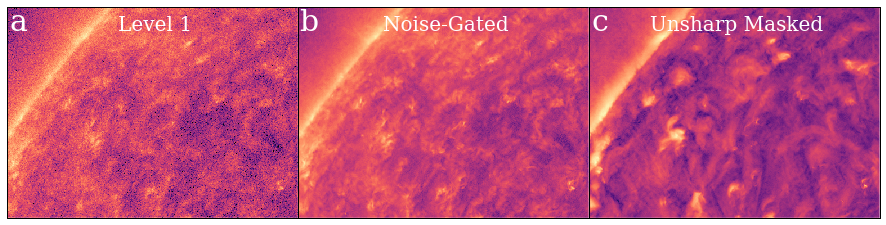

In [13]:
fig = plt.figure(figsize=(fszh,fszv))

#131 - Raw
fileName = 'aia.lev1_euv_12s.2012-10-20T211422Z.131.image_lev1.fits'
aia_full = sunpy.map.Map('aia/' + fileName)
aia_full = sunpy.instr.aia.aiaprep(aia_full)

aia_smll = aia_full.submap(u.Quantity(xlim),u.Quantity(ylim)) 
cmap = cm.get_cmap('sdoaia131')
cmap = plt.get_cmap('magma')

ax1 = fig.add_axes([ppx1, ppadv/2, fw, 1-ppadv], projection=aia_smll)
aia_smll.plot(cmap=cmap, clim=(0 ,100), axes=ax1, interpolation='none', annotate=False)
#plt.text(0.99*aia_smll.data.shape[0], 0.92*aia_smll.data.shape[0], 'Level 1', fontdict=fontws,
#        horizontalalignment='right', verticalalignment='center')

#plt.text(1*aia_smll.data.shape[0], 1.05*aia_smll.data.shape[0], 'AIA 131', fontdict=fontbl,
#        horizontalalignment='center', verticalalignment='center')
#ax1.set_title('Level 1')

plt.text(0.1*aia_smll.data.shape[0]/2, 0.925*aia_smll.data.shape[0], 'a', fontdict=fontw,
        horizontalalignment='center', verticalalignment='center')

plt.text(0.7*aia_smll.data.shape[0], 0.91*aia_smll.data.shape[0], 'Level 1', fontdict=fontws,
        horizontalalignment='center', verticalalignment='center')


x2 = ax1.coords[0]
x2.set_ticks_visible(False)
x2.set_ticklabel_visible(False)
x2.set_axislabel('')
x2.set_ticks(spacing=450 * u.arcsec)
x2.grid(draw_grid=False)

y2 = ax1.coords[1]
y2.set_ticks_visible(False)
y2.set_ticklabel_visible(False)
y2.set_axislabel('')
y2.set_ticks(spacing=450 * u.arcsec)
y2.grid(draw_grid=False)


#131 - Gated
aia_full = sunpy.map.Map('aia-gated/' + fileName)
aia_full = sunpy.instr.aia.aiaprep(aia_full)

aia_smll = aia_full.submap(u.Quantity(xlim),u.Quantity(ylim)) 

ax2 = fig.add_axes([ppx2, ppadv/2, fw, 1-ppadv], projection=aia_smll)
aia_smll.plot(cmap=cmap, clim=(0 ,100), axes=ax2, interpolation='none', annotate=False)
#plt.text(0.99*aia_smll.data.shape[0], 0.92*aia_smll.data.shape[0], 'Noise-Gated', fontdict=fontws,
#        horizontalalignment='right', verticalalignment='center')
#ax2.set_title('Noise-Gated')

plt.text(0.1*aia_smll.data.shape[0]/2, 0.925*aia_smll.data.shape[0], 'b', fontdict=fontw,
        horizontalalignment='center', verticalalignment='center')

plt.text(0.7*aia_smll.data.shape[0], 0.91*aia_smll.data.shape[0], 'Noise-Gated', fontdict=fontws,
        horizontalalignment='center', verticalalignment='center')


x2 = ax2.coords[0]
x2.set_ticks_visible(False)
x2.set_ticklabel_visible(False)
x2.set_axislabel('')
x2.set_ticks(spacing=450 * u.arcsec)
x2.grid(draw_grid=False)

y2 = ax2.coords[1]
y2.set_ticks_visible(False)
y2.set_ticklabel_visible(False)
y2.set_axislabel('')
y2.set_ticks(spacing=450 * u.arcsec)
y2.grid(draw_grid=False)



#131 - Minsmooth
fileName = 'aia.lev1_euv_12s.2012-10-20T211422Z.131.image_lev1.fits'
aia_full = sunpy.map.Map('aia-gated/' + fileName)
aia_tmp = sunpy.map.Map('minsmooth/unsharp-for-andres.fits')

aia_full.data = aia_tmp.data
aia_full = sunpy.instr.aia.aiaprep(aia_full)

aia_smll = aia_full.submap(u.Quantity(xlim),u.Quantity(ylim)) 

ax3 = fig.add_axes([ppx3, ppadv/2, fw, 1-ppadv], projection=aia_smll)
aia_smll.plot(cmap=cmap, axes=ax3, interpolation='none', annotate=False)
#plt.text(0.99*aia_smll.data.shape[0], 0.92*aia_smll.data.shape[0], 'Noise-Gated', fontdict=fontws,
#        horizontalalignment='right', verticalalignment='center')
#ax3.set_title('Unsharp Masked')

plt.text(0.1*aia_smll.data.shape[0]/2, 0.925*aia_smll.data.shape[0], 'c', fontdict=fontw,
        horizontalalignment='center', verticalalignment='center')

plt.text(0.7*aia_smll.data.shape[0], 0.91*aia_smll.data.shape[0], 'Unsharp Masked', fontdict=fontws,
        horizontalalignment='center', verticalalignment='center')


x2 = ax3.coords[0]
x2.set_ticks_visible(False)
x2.set_ticklabel_visible(False)
x2.set_axislabel('')
x2.set_ticks(spacing=450 * u.arcsec)
x2.grid(draw_grid=False)

y2 = ax3.coords[1]
y2.set_ticks_visible(False)
y2.set_ticklabel_visible(False)
y2.set_axislabel('')
y2.set_ticks(spacing=450 * u.arcsec)
y2.grid(draw_grid=False)


plt.show()

fig.savefig('AIA_Raw_Gated_Unsharp.png', dpi=dpi*2, interpolation='none')